Optimal Parameters: [2.549597842664042, 18.08551431443435, 0.7372458463991299, 0.9468470629975027, 0.9900121835048808]
Minimum Cost: 1.2078773922120905


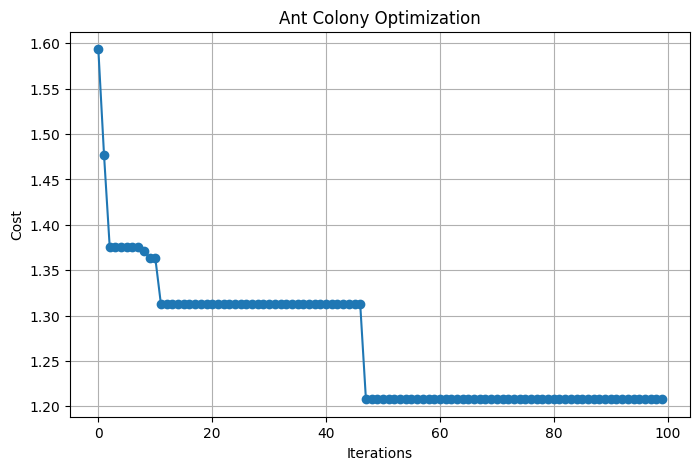

In [5]:
import random
import math
import matplotlib.pyplot as plt

# Define the complex cost function
# Define the complex cost function
def complex_cost_function(D, F, Q, SM, WD):
    # Coefficients
    a1 = 0.5  # Weight for irrigation duration
    a2 = 0.3  # Weight for irrigation frequency
    a3 = 0.2  # Weight for flow rate
    a4 = 0.4  # Weight for soil moisture
    a5 = 0.6  # Weight for weather data

    # Define constraints
    min_duration = 2  # Minimum allowable irrigation duration (hours)
    max_duration = 8  # Maximum allowable irrigation duration (hours)
    min_frequency = 12  # Minimum allowable irrigation frequency (hours)
    max_frequency = 36  # Maximum allowable irrigation frequency (hours)
    max_flow_rate = 2.0  # Maximum allowable flow rate (L/s)

    # Calculate cost components
    cost_duration = a1 * math.exp(D / max_duration)  # Penalize long durations
    cost_frequency = a2 * math.exp((F - min_frequency) / (max_frequency - min_frequency))  # Penalize low frequency
    cost_flow_rate = a3 * math.exp((Q - max_flow_rate) / max_flow_rate)  # Penalize high flow rate
    cost_soil_moisture = a4 * (1 - SM)  # Penalize dry soil
    cost_weather_data = a5 * (1 - WD)  # Penalize unfavorable weather

    # Calculate the total cost
    total_cost = cost_duration + cost_frequency + cost_flow_rate + cost_soil_moisture + cost_weather_data

    return total_cost


# Ant Colony Optimization (ACO) algorithm for optimization with plotting
def ant_colony_optimization_with_plot(num_ants, num_iterations, evaporation_rate, pheromone_weight, heuristic_weight, lower_bounds, upper_bounds):
    num_parameters = len(lower_bounds)

    # Initialize pheromone levels on each parameter
    pheromone_levels = [1.0] * num_parameters

    # Lists to store optimization progress for plotting
    iteration_list = []
    best_cost_list = []

    # Initialize the best solution and cost
    best_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
    best_cost = complex_cost_function(*best_solution)

    for iteration in range(num_iterations):
        # Initialize ants
        ants = []
        for _ in range(num_ants):
            ant_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
            ants.append(ant_solution)

        # Evaluate the fitness (cost) of each ant's solution
        fitness_scores = [complex_cost_function(*ant) for ant in ants]

        # Update the best solution if a better one is found
        min_fitness = min(fitness_scores)
        if min_fitness < best_cost:
            best_cost = min_fitness
            best_solution = ants[fitness_scores.index(min_fitness)]

        # Update pheromone levels
        for i in range(num_parameters):
            pheromone_delta = 0.0
            for ant, fitness in zip(ants, fitness_scores):
                pheromone_delta += (1.0 / (fitness + 1e-10)) * (ant[i] - best_solution[i])
            pheromone_levels[i] = (1.0 - evaporation_rate) * pheromone_levels[i] + pheromone_delta

        # Store progress data for plotting
        iteration_list.append(iteration)
        best_cost_list.append(best_cost)

    return best_solution, best_cost, iteration_list, best_cost_list

# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed

# Run the Ant Colony Optimization algorithm to find the optimal parameters and plot the progress
best_params, min_cost, iterations, costs = ant_colony_optimization_with_plot(num_ants=20, num_iterations=100, evaporation_rate=0.1, pheromone_weight=1.0, heuristic_weight=1.0, lower_bounds=lower_bounds, upper_bounds=upper_bounds)

# Output the results
print("Optimal Parameters:", best_params)
print("Minimum Cost:", min_cost)

# Plot optimization progress
plt.figure(figsize=(8, 5))
plt.plot(iterations, costs, marker='o', linestyle='-')
plt.title("Ant Colony Optimization")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()